Aquesta base de dades recull les diferents accions de seguiment que ha rebut la persona

En aquest cas hem creat la columna:

a.	**Quantitat de seguiments** on hem recollit el nombre de seguiments que ha rebut la persona.


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv ('Seguiments.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

In [3]:
#seleccionem columnes amb informació interessant
df=df[['Tipus','Durada (en minuts)','Participants','Persona.1','Canal de gestió','Projecte','Àmbit','Estat']]
df.head()

,Tipus,Durada (en minuts),Participants,Persona.1,Canal de gestió,Projecte,Àmbit,Estat
0,Tramitació,20.0,Família,608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130,Telèfon,Acompanyament a famílies,NaN,Realitzat
1,Entrevista inicial,60.0,Persona atesa,14d55c40-355c-dd4c-4459-5e0dc50e2155,NaN,NaN,NaN,Derivat a
2,Tramitació,45.0,Persona atesa,505fc9eb-9f43-7354-1df5-5bb4a039c663,Presencial a l'entitat,Acompanyament a la Persona amb Sordesa,NaN,Realitzat
3,Altres,5.0,Persona atesa,5c7050e6-4049-2055-0cef-5f83361fa157,Correu electrònic,Acompanyament a la Persona amb Sordesa,NaN,Realitzat
4,Tramitació,5.0,Família,217ec157-74cd-8caf-664c-5f06d2bbc38b,Correu electrònic,Acompanyament a famílies,NaN,Realitzat


In [4]:
#cambem Persona.1 a ID
df.rename(columns={'Persona.1':'ID'},inplace=True)

In [5]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

,Tipus,Durada (en minuts),Participants,ID,Canal de gestió,Projecte,Àmbit,Estat
0,Tramitació,20.0,Família,608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130,Telèfon,Acompanyament a famílies,NaN,Realitzat
1,Entrevista inicial,60.0,Persona atesa,14d55c40-355c-dd4c-4459-5e0dc50e2155,NaN,NaN,NaN,Derivat a
2,Tramitació,45.0,Persona atesa,505fc9eb-9f43-7354-1df5-5bb4a039c663,Presencial a l'entitat,Acompanyament a la Persona amb Sordesa,NaN,Realitzat
3,Altres,5.0,Persona atesa,5c7050e6-4049-2055-0cef-5f83361fa157,Correu electrònic,Acompanyament a la Persona amb Sordesa,NaN,Realitzat
4,Tramitació,5.0,Família,217ec157-74cd-8caf-664c-5f06d2bbc38b,Correu electrònic,Acompanyament a famílies,NaN,Realitzat


<AxesSubplot: title={'center': 'Dades incompletes a Seguiments'}>

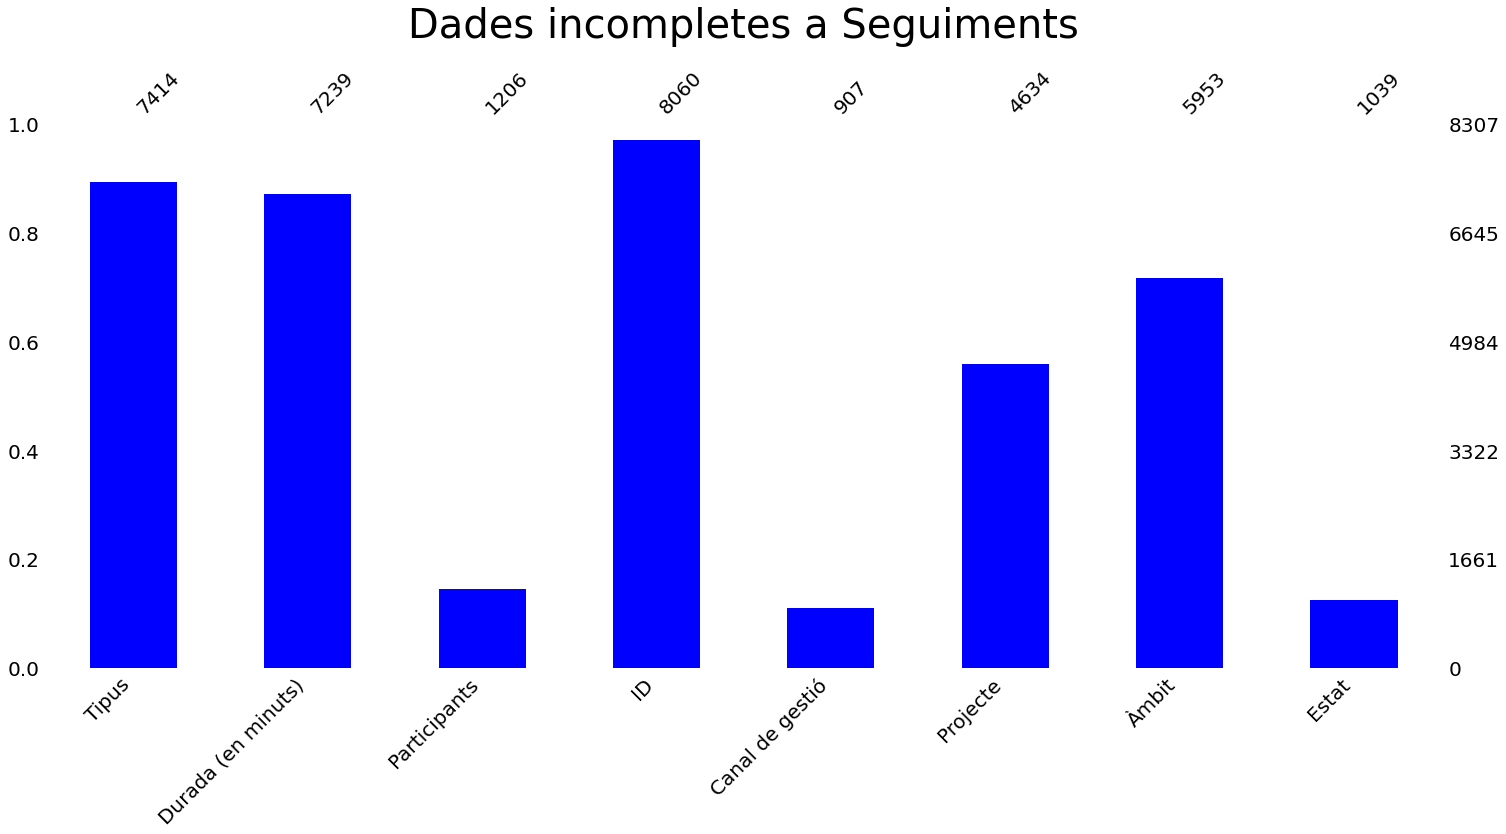

In [6]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Seguiments',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

In [7]:
#percentatge de valors 0 a Durada en minuts, ens serveix per detectar possibles nans a la columna
(df['Durada (en minuts)'] == 0).sum()/df.shape[0]*100


59.0465872156013

Degut a la baixa quantitat de dades recollides de diferents variables i que el 59% de les dades de la durada és 0,ens quedem només amb les columnes ID i Tipus

In [8]:
#seleccionem columnes
df=df[['ID','Tipus']]

No ens interessa tant el tipus de seguiment que ha realitzat la persona com la quanitat de seguiments que ha realizat

In [9]:
#creem columna amb quantitat de sessions per ID
counts = df['ID'].value_counts()
df['Quantitat seguiments'] = df['ID'].map(counts)

In [10]:
#eliminem la columna Tipus
df=df[['ID','Quantitat seguiments']]

In [11]:
#eliminem dupicats per ID
df.drop_duplicates(subset='ID',keep='first',inplace=True)
df.head()

,ID,Quantitat seguiments
0,608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130,1.0
1,14d55c40-355c-dd4c-4459-5e0dc50e2155,29.0
2,505fc9eb-9f43-7354-1df5-5bb4a039c663,3.0
3,5c7050e6-4049-2055-0cef-5f83361fa157,7.0
4,217ec157-74cd-8caf-664c-5f06d2bbc38b,6.0


In [12]:
#eliminar nulls a la columna ID
df.dropna(subset=['ID'],inplace=True)

In [13]:
#pasar df a csv
df.to_csv ('Seguiments_final.csv',index=False,encoding='utf-8')